## Cluster Analysis

This script imports the filtered data, runs tSNE reduction to 2D and cluster visualisations

In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sn
from sklearn.manifold import TSNE

In [3]:
# Read in filtered data
file_path = 'data/filtered_data.csv'
df = pd.read_csv(file_path)
df.shape

(26141, 47)

In [4]:
print("Number of user IDs",len(df['userID'].unique()))

Number of user IDs 1918


In [5]:
df.columns

Index(['ID', 'date', 'datetime', 'create_date', 'updated_date', 'userID',
       'periodID', 'period', 'sex', 'period_intensity', 'pain_level',
       'backaches', 'bodyaches', 'stomach_cramps', 'joint_pains',
       'tender_breasts', 'overall_pain', 'headache', 'indigestion', 'bloating',
       'constipation', 'diarrhea', 'nausea', 'vomiting', 'appetite_loss',
       'cravings_salty', 'cravings_sweet', 'nutrition', 'skin_changes', 'acne',
       'tiredness', 'dizziness', 'pins_and_needles', 'temperature', 'fever',
       'hot_flashes', 'short_of_breath', 'coughing', 'insomnia', 'sleep',
       'weight', 'steps', 'water', 'medication', 'notes', 'other_moods',
       'other_lifestyles'],
      dtype='object')

In [6]:
# Specify the columns to be ignored
ignore_columns = ['ID', 'date', 'datetime', 'create_date', 'updated_date', 'userID', 'periodID',  
                  'nutrition', 'medication', 'notes', 'other_moods', 'other_lifestyles']
df = df.drop(columns=ignore_columns)

# Convert relevant columns to categorical 
categorical_columns = ['period', 'sex', 'period_intensity', 'pain_level','backaches', 'bodyaches', 'stomach_cramps', 
                       'joint_pains', 'tender_breasts', 'overall_pain', 'headache','indigestion', 'bloating', 'constipation', 
                       'diarrhea','nausea', 'vomiting', 'appetite_loss', 'cravings_salty','cravings_sweet', 'skin_changes', 
                       'acne','tiredness','dizziness','pins_and_needles','temperature','fever','hot_flashes','short_of_breath',
                       'coughing', 'insomnia']

for col in categorical_columns:
    df[col] = df[col].astype('category')
    
df.shape

(26141, 35)

In [7]:
#for col in df.columns:
#    print(df[col].value_counts())

In [8]:
# Symptoms that can be mild (0), medium(1) or severe (2) - need to add 1 to all values
# Before filling NaN with 0

symptoms = ['pain_level', 'period_intensity', 'backaches', 'bodyaches', 'stomach_cramps', 'joint_pains', 'tender_breasts', 
            'overall_pain','headache', 'indigestion', 'bloating', 'constipation', 'diarrhea', 'nausea', 'vomiting', 
            'appetite_loss', 'cravings_salty', 'cravings_sweet', 'skin_changes', 'acne', 'tiredness', 'dizziness', 
            'pins_and_needles', 'temperature', 'fever', 'hot_flashes', 'short_of_breath', 'coughing', 'insomnia',]

# Add 1 to all non-NaN values in the specified columns
# Add 0 as a new category for each symptom
for col in symptoms:
    df[col] = df[col].apply(lambda x: x + 1 if pd.notna(x) else x)    
    df[col] = df[col].cat.add_categories([0])


In [9]:
df.isnull().any()

period              False
sex                 False
period_intensity     True
pain_level           True
backaches            True
bodyaches            True
stomach_cramps       True
joint_pains          True
tender_breasts       True
overall_pain         True
headache             True
indigestion          True
bloating             True
constipation         True
diarrhea             True
nausea               True
vomiting             True
appetite_loss        True
cravings_salty       True
cravings_sweet       True
skin_changes         True
acne                 True
tiredness            True
dizziness            True
pins_and_needles     True
temperature          True
fever                True
hot_flashes          True
short_of_breath      True
coughing             True
insomnia             True
sleep                True
weight               True
steps                True
water                True
dtype: bool

In [10]:
# For weight, steps, water and sleep, fill in missing values with the median value
df['weight'] = df['weight'].fillna(df['weight'].mean())
df['steps'] = df['steps'].fillna(df['steps'].mean())
df['water'] = df['water'].fillna(df['water'].mean())
df['sleep'] = df['sleep'].fillna(df['sleep'].mean())

In [11]:
df.isnull().any()

period              False
sex                 False
period_intensity     True
pain_level           True
backaches            True
bodyaches            True
stomach_cramps       True
joint_pains          True
tender_breasts       True
overall_pain         True
headache             True
indigestion          True
bloating             True
constipation         True
diarrhea             True
nausea               True
vomiting             True
appetite_loss        True
cravings_salty       True
cravings_sweet       True
skin_changes         True
acne                 True
tiredness            True
dizziness            True
pins_and_needles     True
temperature          True
fever                True
hot_flashes          True
short_of_breath      True
coughing             True
insomnia             True
sleep               False
weight              False
steps               False
water               False
dtype: bool

In [12]:
# Fill all remaining nan values with 0 - which assumes that symptom was not present
df = df.fillna(0)
df.isnull().values.any()

False

In [13]:
#for col in df.columns:
#    print(df[col].value_counts())

In [14]:
# Create a t-SNE instance and reduce the dimensionality to 2D
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_embedded = tsne.fit_transform(df)

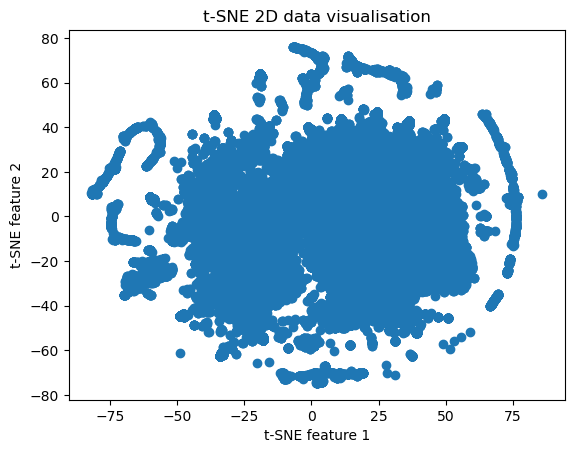

In [15]:
# Plot the 2D representation - filtered data
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE 2D data visualisation')
plt.savefig('fig/tSNE_2D_data.png', dpi=300)  
plt.show()

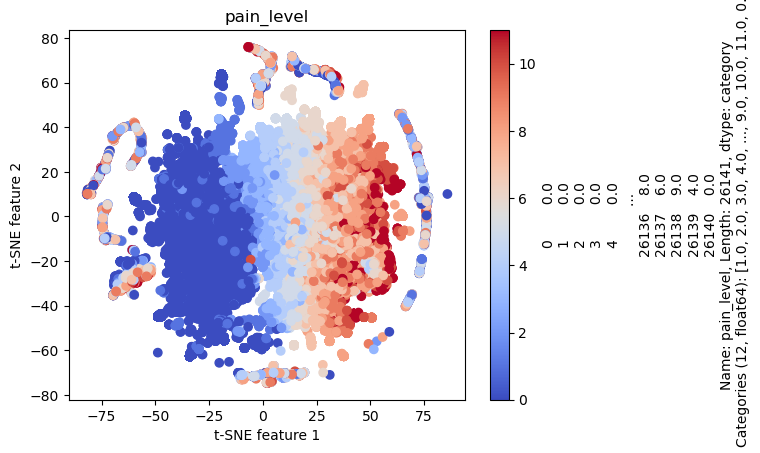

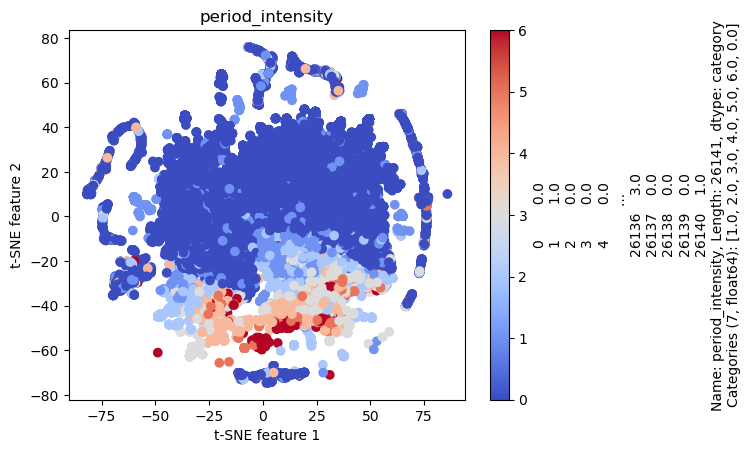

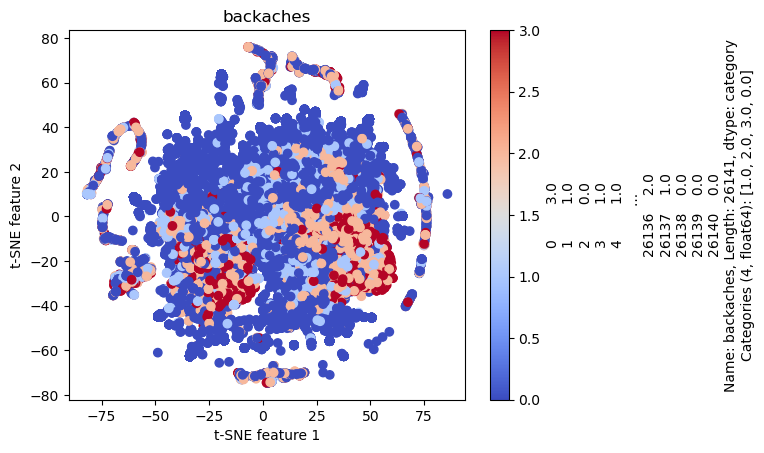

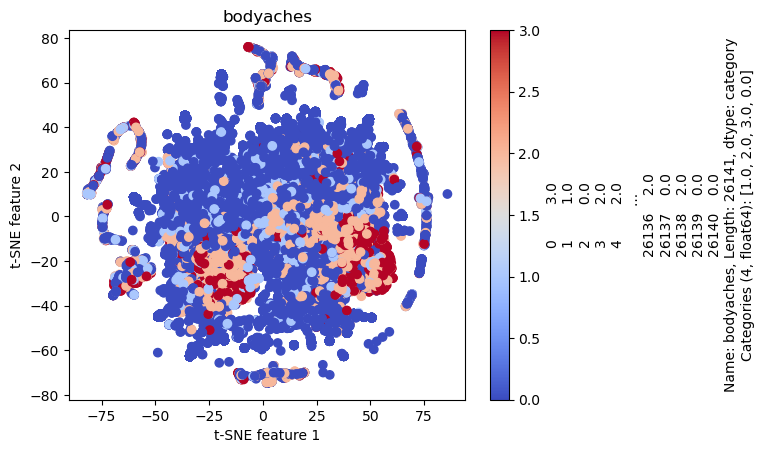

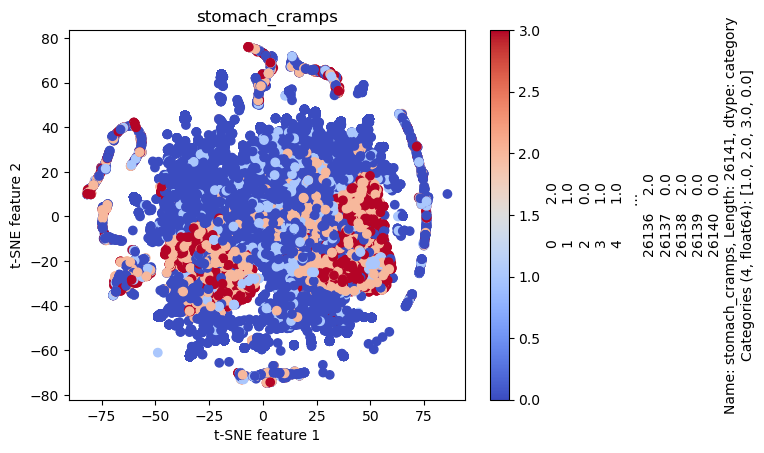

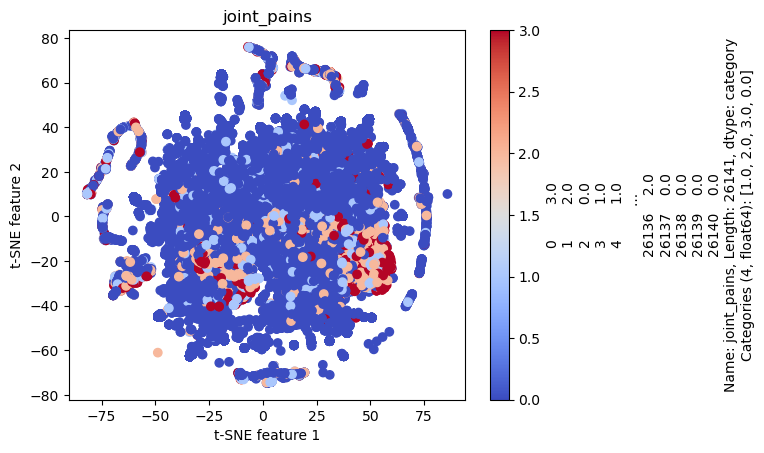

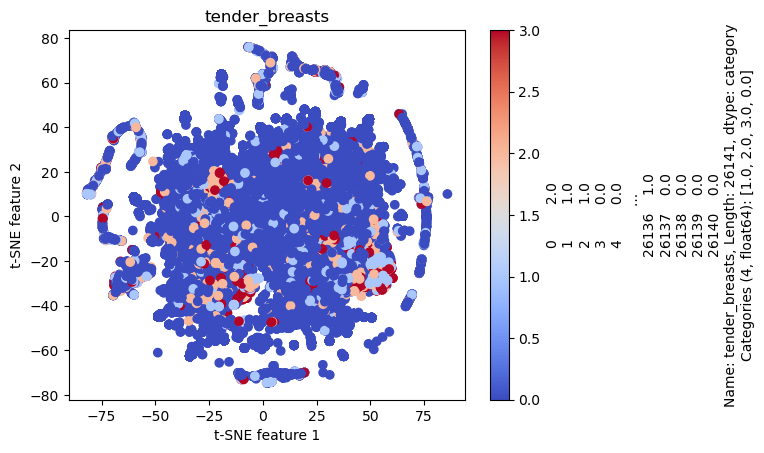

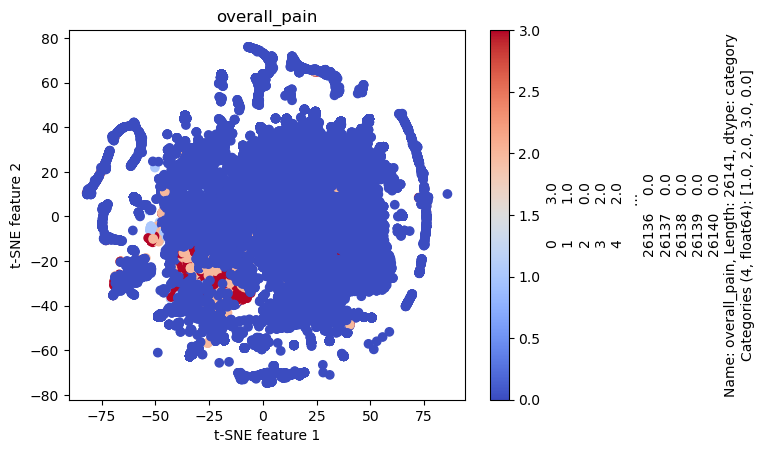

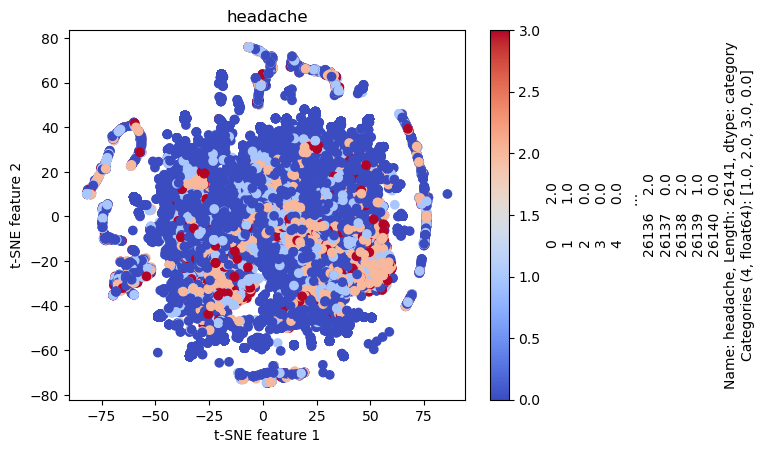

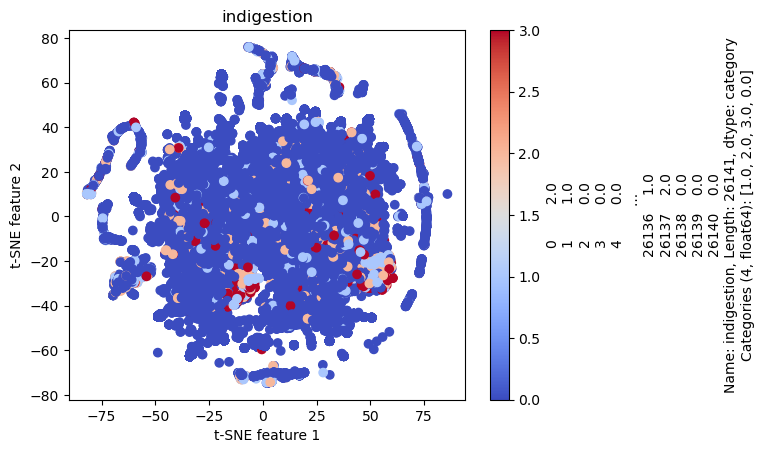

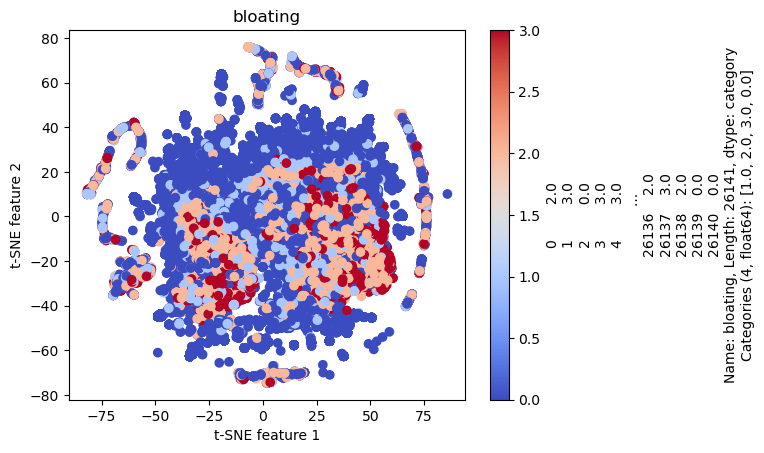

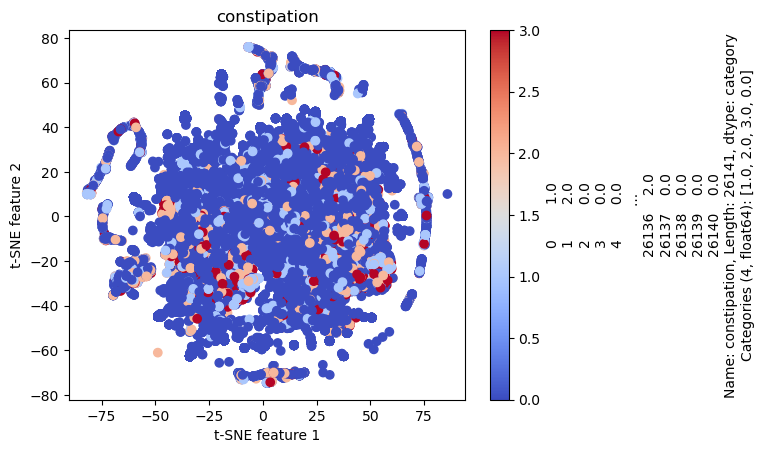

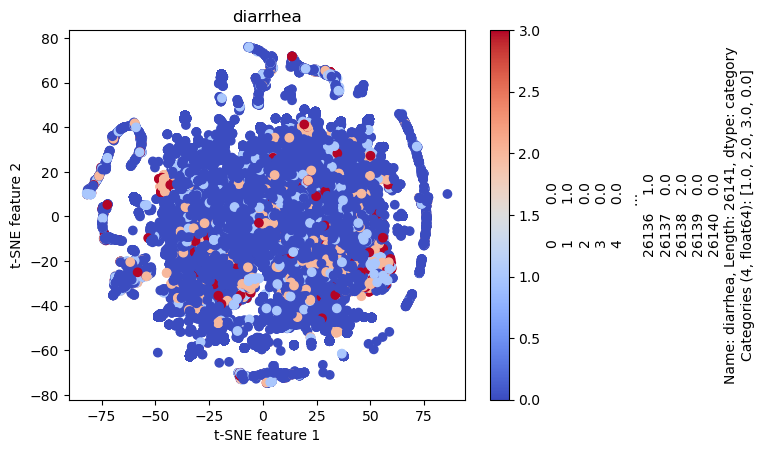

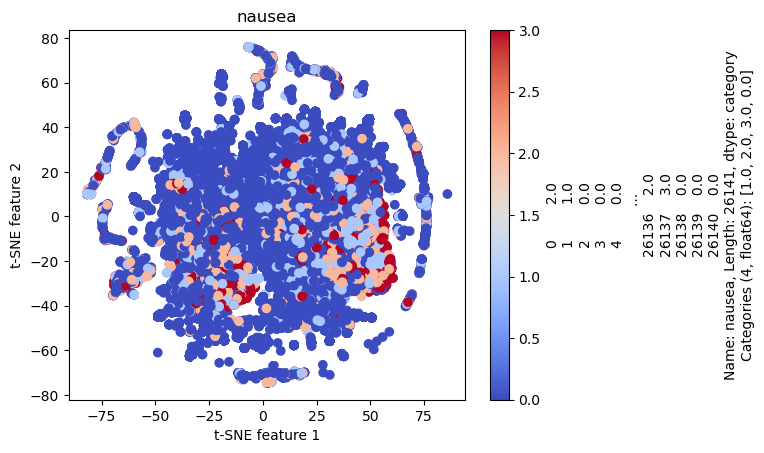

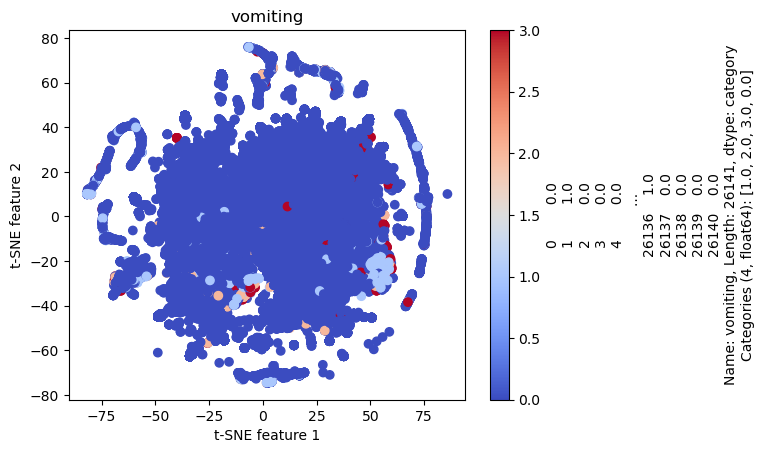

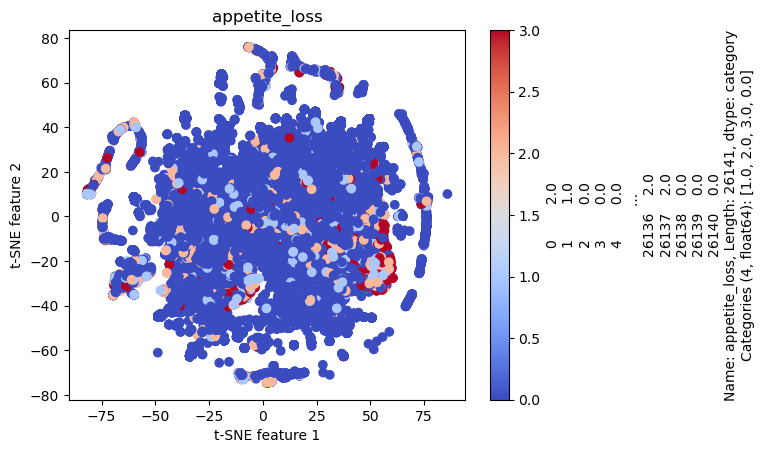

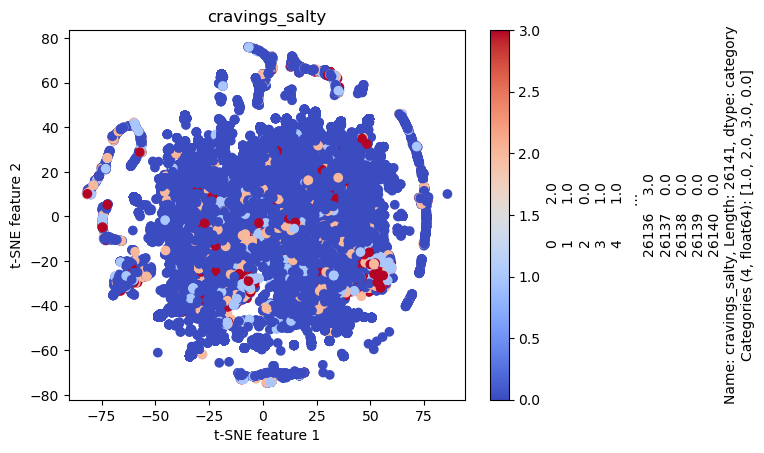

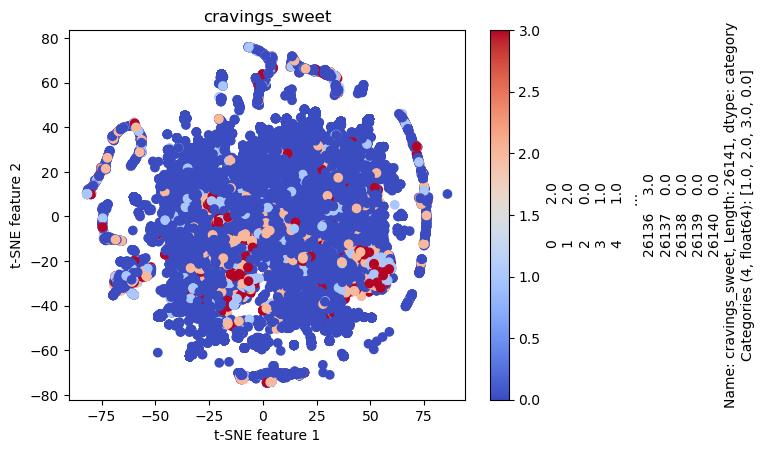

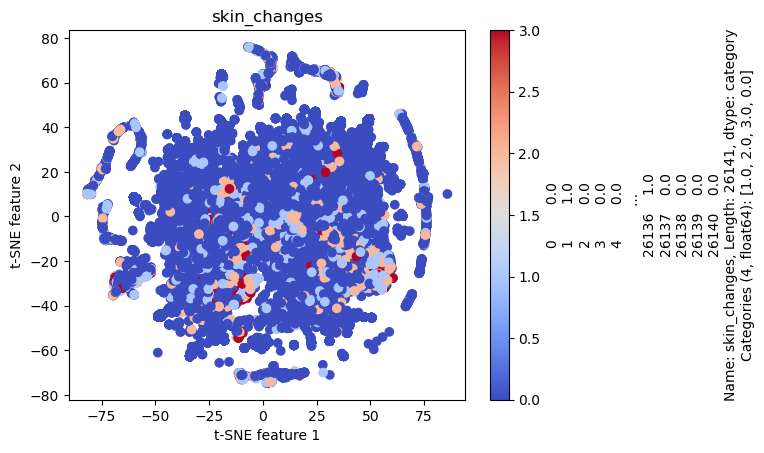

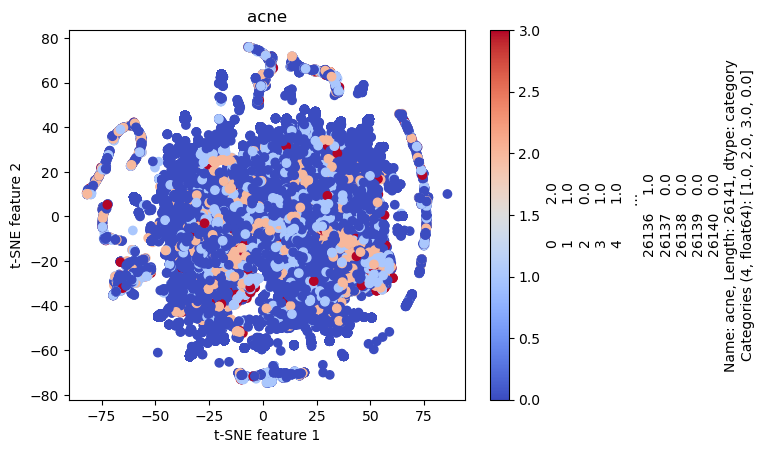

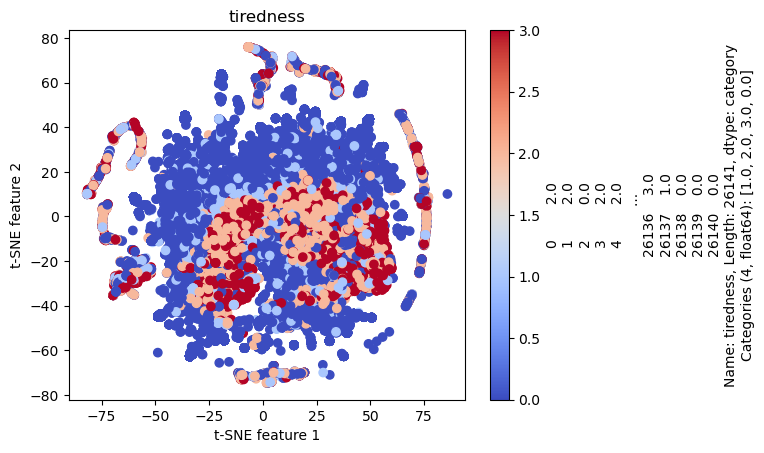

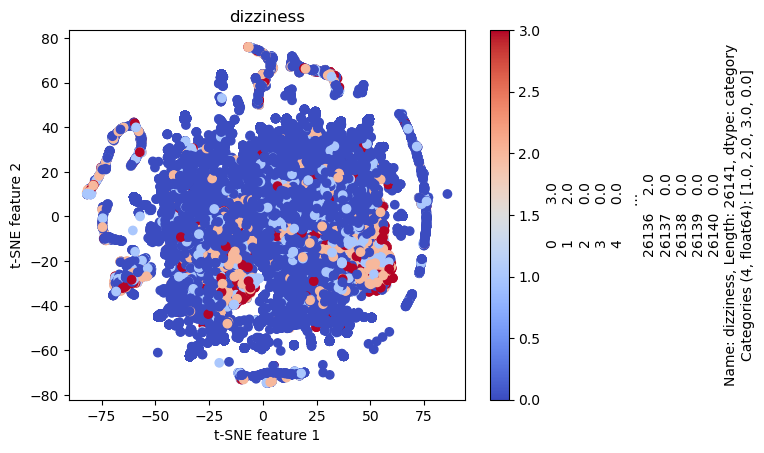

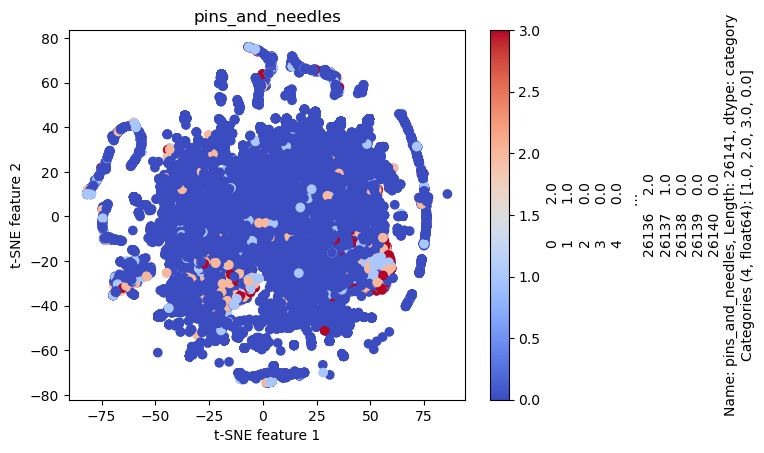

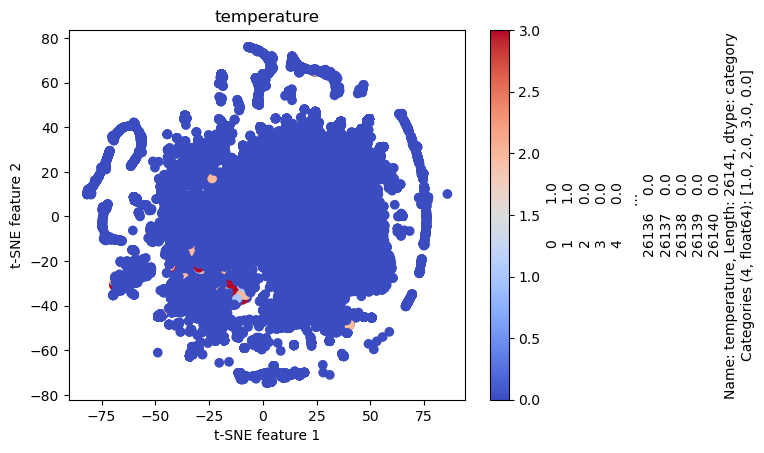

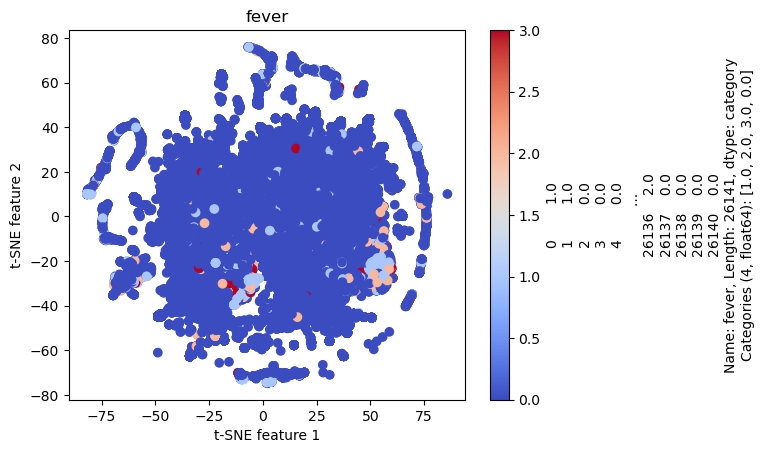

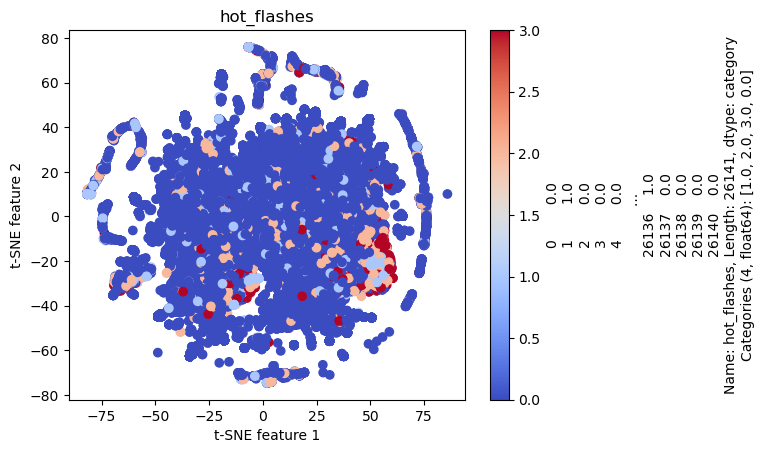

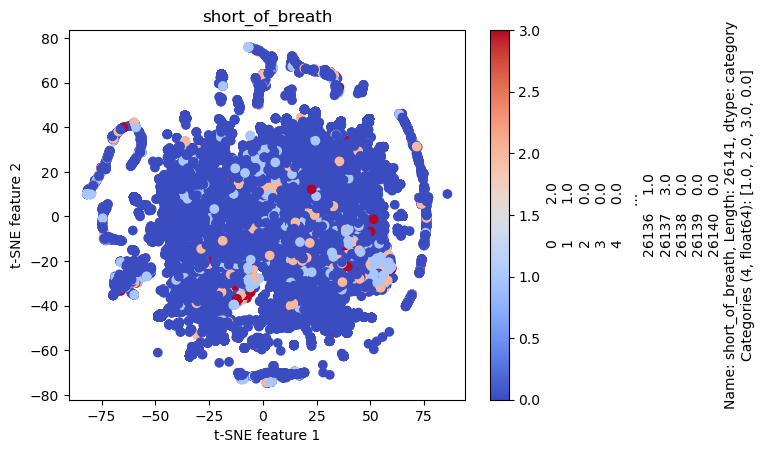

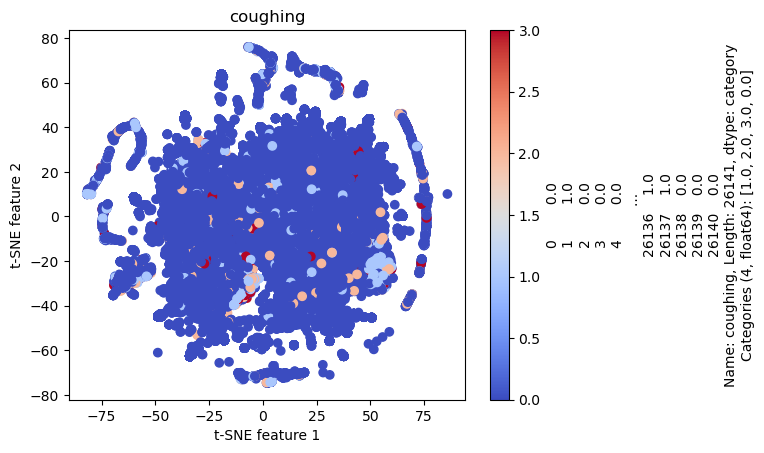

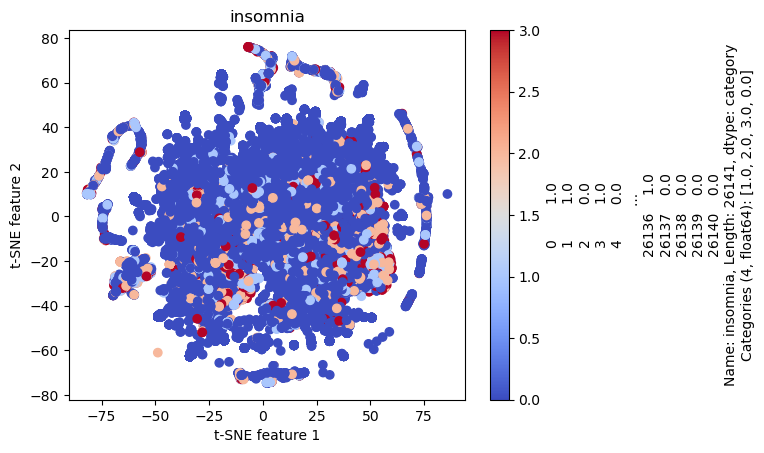

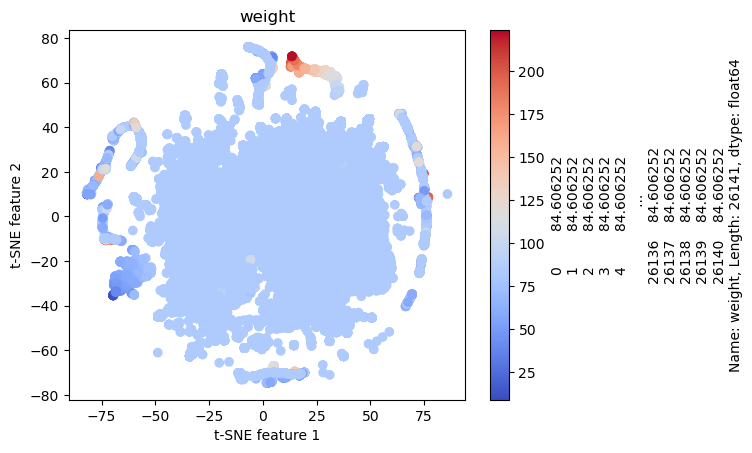

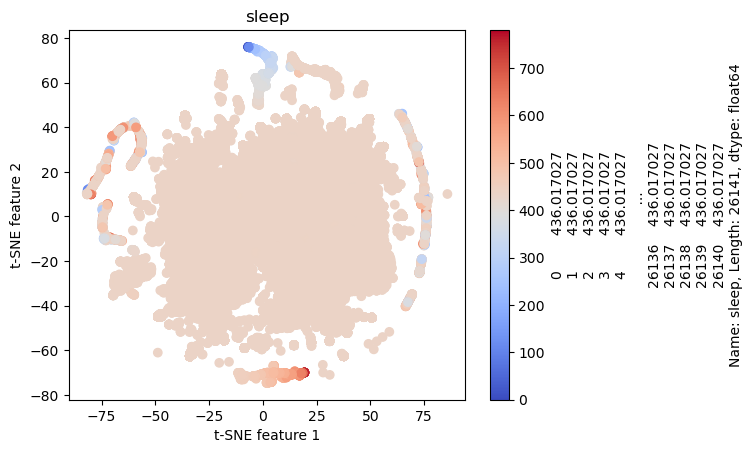

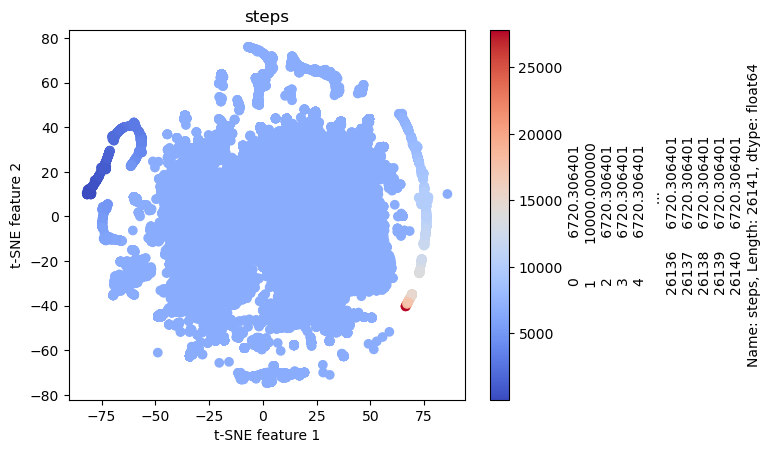

In [16]:
# Colour coded plot the 2D representation 
# Iterate over variables of interest

variables = ['pain_level', 'period_intensity', 'backaches', 'bodyaches', 'stomach_cramps', 'joint_pains', 'tender_breasts', 
            'overall_pain','headache', 'indigestion', 'bloating', 'constipation', 'diarrhea', 'nausea', 'vomiting', 
            'appetite_loss', 'cravings_salty', 'cravings_sweet', 'skin_changes', 'acne', 'tiredness', 'dizziness', 
            'pins_and_needles', 'temperature', 'fever', 'hot_flashes', 'short_of_breath', 'coughing', 'insomnia',
             'weight', 'sleep', 'steps',]

for var in variables:
    variable = df[var]
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=variable, cmap='coolwarm')
    plt.colorbar(scatter, label=variable)
    plt.xlabel('t-SNE feature 1')
    plt.ylabel('t-SNE feature 2')
    plt.title(f'{var}')
    plt.savefig(f'fig/tSNE_{var}.png', dpi=300)  
    plt.show()